This is an exploratory data analysis with pictures of light curves.

Credits go to: https://www.kaggle.com/mithrillion/all-classes-light-curve-characteristics-updated.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 18px; }</style>"))

In [2]:
!pip install cesium

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from itertools import chain
sns.set_style('whitegrid')
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', RuntimeWarning)
import cesium.featurize as featurize
from gatspy.periodic import LombScargleMultiband, LombScargleMultibandFast
import pdb

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
train_metadata_path = './gdrive/My Drive/Colab Notebooks/2019 Summer - Practice/data-my/train_metadata.csv'

train_metadata = pd.read_csv(train_metadata_path)

In [0]:
train_lightcurves_path = './gdrive/My Drive/Colab Notebooks/2019 Summer - Practice/data-my/train_lightcurves.csv' 

train_lightcurves = pd.read_csv(train_lightcurves_path)
train_lightcurves['detected'] = train_lightcurves['detected_bool']
del train_lightcurves['detected_bool']

In [8]:
train_metadata

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,true_target,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,92,1,0.000,0.000,0.000,0.0,0.0,0.000,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,88,1,1.817,45.703,0.000,0.0,0.0,0.000,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,42,2,0.233,40.328,0.004,4.5,0.0,0.000,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,90,1,0.301,40.969,-0.004,257.7,0.0,0.000,60130.453,38,0.0,0.0,0.0,0.0,0.0,0.0
4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,90,1,0.193,39.866,-0.002,-368.8,0.0,0.000,60452.641,1,0.0,0.0,0.0,0.0,0.0,0.0
5,1227,35.6836,-5.3794,1,0.000,0.000,0.000,-9.000,0.020,65,65,1,0.000,0.000,0.000,0.0,0.0,0.000,59570.000,47,2.3,11.6,31.6,240.0,632.4,1187.7
6,1598,347.8467,-64.7609,1,0.135,0.182,0.030,39.728,0.019,90,90,1,0.136,39.030,-0.002,-135.1,0.0,0.000,60628.816,20,0.0,0.0,0.0,0.0,0.0,0.0
7,1632,348.5959,-63.0726,1,0.686,0.701,0.010,43.152,0.021,42,42,3,0.688,43.097,-0.029,-626.6,3.1,0.051,59602.090,93,0.0,0.0,0.0,0.0,0.0,0.0
8,1920,149.4141,3.4338,1,0.309,0.323,0.336,41.140,0.027,90,90,1,0.311,41.038,0.002,-290.8,0.0,0.000,59996.625,107,0.0,0.0,0.0,0.0,0.0,0.0
9,1926,149.4141,1.9401,1,0.000,0.000,0.000,-9.000,0.018,65,65,1,0.000,0.000,0.000,0.0,0.0,0.000,59570.000,15,16.6,130.6,450.4,2237.3,4903.2,8229.6


In [9]:
train_lightcurves

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1
5,615,59752.4147,1,-1061.457031,6.472994,1
6,615,59752.4224,3,-524.954590,3.552751,1
7,615,59752.4334,4,-393.480225,3.599346,1
8,615,59752.4435,5,-355.886780,10.421921,1
9,615,59767.2968,2,-548.013550,3.462291,1


In [0]:
groups = train_lightcurves.groupby(['object_id', 'passband'])
times = groups.apply(
    lambda block: block['mjd'].values).reset_index().rename(columns={0: 'seq'})
flux = groups.apply(
    lambda block: block['flux'].values
).reset_index().rename(columns={0: 'seq'})
err = groups.apply(
    lambda block: block['flux_err'].values
).reset_index().rename(columns={0: 'seq'})
det = groups.apply(
    lambda block: block['detected'].astype(bool).values
).reset_index().rename(columns={0: 'seq'})
times_list = times.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()
flux_list = flux.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()
err_list = err.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()
det_list = det.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()

Here we shall examine which classes have periodic behaviour:

In [0]:
def fit_multiband_freq(tup):
    idx, group = tup
    t, f, e, b = group['mjd'], group['flux'], group['flux_err'], group['passband']
    model = LombScargleMultiband(fit_period=True)
    model.optimizer.period_range = (0.1, int((group['mjd'].max() - group['mjd'].min()) / 2))
    model.fit(t, f, e, b)
    return model

In [0]:
def get_freq_features(N, subsetting_pos=None):
    if subsetting_pos is None:
        subset_times_list = times_list
        subset_flux_list = flux_list
    else:
        subset_times_list = [v for i, v in enumerate(times_list) 
                             if i in set(subsetting_pos)]
        subset_flux_list = [v for i, v in enumerate(flux_list) 
                            if i in set(subsetting_pos)]
    feats = featurize.featurize_time_series(times=subset_times_list[:N],
                                            values=subset_flux_list[:N],
                                            features_to_use=['skew',
                                                            'percent_beyond_1_std',
                                                            'percent_difference_flux_percentile'
                                                            ],
                                            scheduler=None)
    subset = train_lightcurves[train_lightcurves['object_id'].isin(
        train_metadata['object_id'].iloc[subsetting_pos].iloc[:N])]
    models = list(map(fit_multiband_freq, subset.groupby('object_id')))
    feats['object_pos'] = subsetting_pos[:N]
    feats['freq1_freq'] = [model.best_period for model in models]
    return feats, models

In [13]:
unique_classes = train_metadata['target'].unique()
print(len(unique_classes))
unique_classes

14


array([92, 88, 42, 90, 65, 16, 67, 95, 62, 15, 52,  6, 64, 53])

In [0]:
def get_class_feats(label, N=3):
    class_pos = train_metadata[train_metadata['target'] == label].index
    class_feats, class_models = get_freq_features(N, class_pos)
    return class_feats, class_models

In [0]:
def plot_phase_curves(feats, models, use_median_freq=False, hide_undetected=True, N=3):
    for i in range(N):
        freq = feats.loc[i, 'freq1_freq'].median()
        freq_min = feats.loc[i, 'freq1_freq'].min()
        freq_std = feats.loc[i, 'freq1_freq'].std()
        skew = feats.loc[i, 'skew'].mean()
        object_pos = int(feats.loc[i, 'object_pos'][0])
        f, ax = plt.subplots(1, 2, figsize=(14, 4))
        sample = train_lightcurves[train_lightcurves['object_id'] ==
                              train_metadata['object_id'].iloc[object_pos]].copy()
        colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
        score = models[i].score(models[i].best_period)
        
        ax[0].scatter(x=sample['mjd'], 
                   y=sample['flux'], 
                   c=[colors[b] for b in sample['passband']],
                   s=8, alpha=0.8)
        ax[0].vlines(sample['mjd'], 
                  sample['flux'] - sample['flux_err'],
                  sample['flux'] + sample['flux_err'],
                  colors=[colors[b] for b in sample['passband']],
                  linewidth=1, alpha=0.8)
        
        sample['phase'] = (sample['mjd'] / models[i].best_period) % 1
        ax[1].scatter(x=sample['phase'], 
                   y=sample['flux'], 
                   c=[colors[b] for b in sample['passband']],
                   s=8, alpha=0.8)
        ax[1].vlines(sample['phase'], 
                  sample['flux'] - sample['flux_err'],
                  sample['flux'] + sample['flux_err'],
                  colors=[colors[b] for b in sample['passband']],
                  linewidth=1, alpha=0.8)
        x_range = np.linspace(sample['mjd'].min(), sample['mjd'].max(), 1000)
        for band in range(6):
            y = models[i].predict(x_range, band)
            xs = (x_range / models[i].best_period) % 1
            ords = np.argsort(xs)
            ax[1].plot(xs[ords], y[ords], c=colors[band], alpha=0.4)
        
        title = ax[0].get_title()
        ax[0].set_title('time')
        ax[1].set_title('phase')
        f.suptitle(title + f'object: {sample["object_id"].iloc[0]}, '
                   f'class: {train_metadata["target"].iloc[object_pos]}\n'
                   f'period: {models[i].best_period: .4}, '
                   f'period score: {score: .4}, '
                   f'mean skew: {skew:.4}', y=1.1)

        plt.show()

In [0]:
warnings.simplefilter('ignore', UserWarning)


### Type II supernovae: class 42

In [0]:
%%capture capt
feats_sn_ii, models_sn_ii = get_class_feats(42)

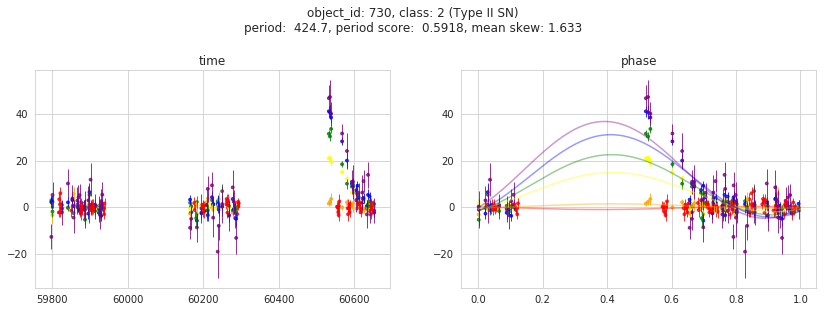

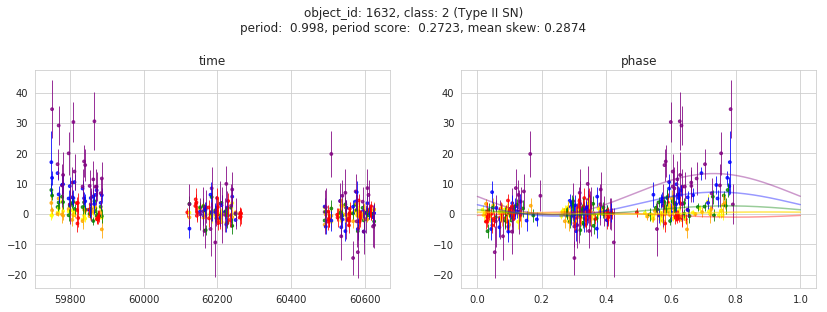

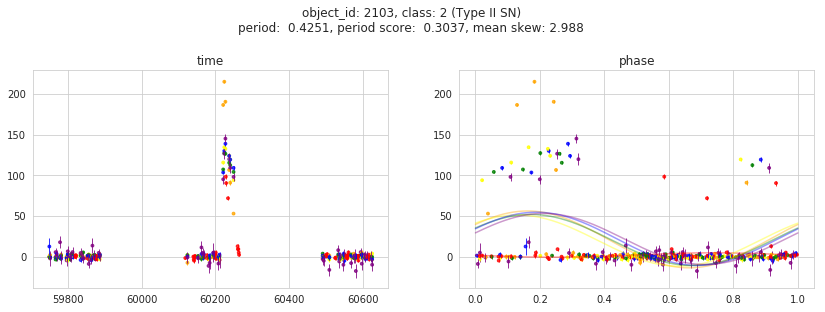

In [21]:
plot_phase_curves(feats_sn_ii, models_sn_ii)

### Type I supernovae: classes 90, 67, 52, 62, 95

In [0]:
%%capture capt
feats_sn_90, models_sn_90 = get_class_feats(90)

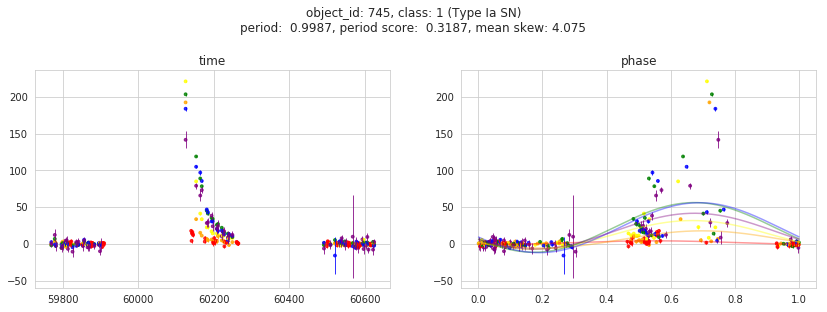

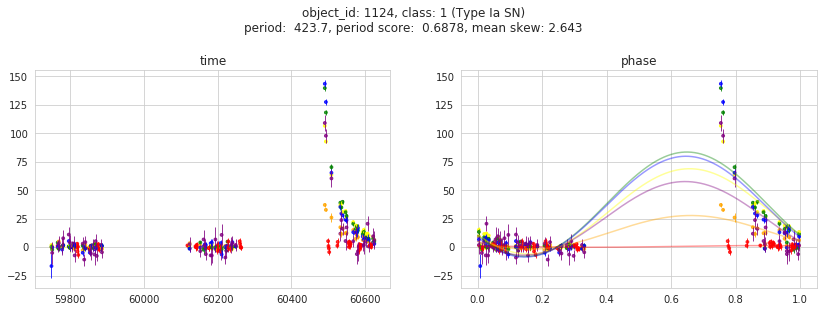

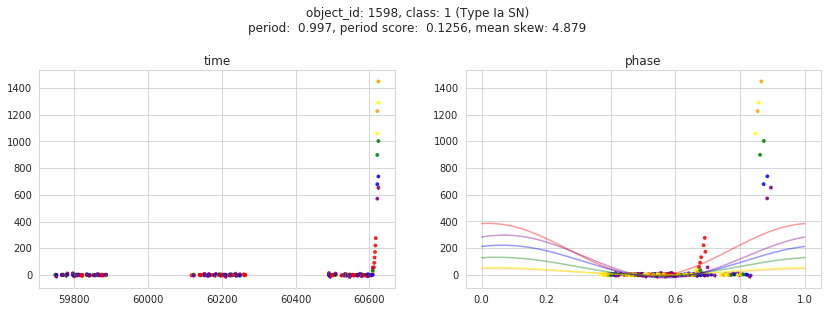

In [24]:
plot_phase_curves(feats_sn_90, models_sn_90)

### RR lyrae: class 92

In [0]:
%%capture capt
feats_92, models_92 = get_class_feats(92)

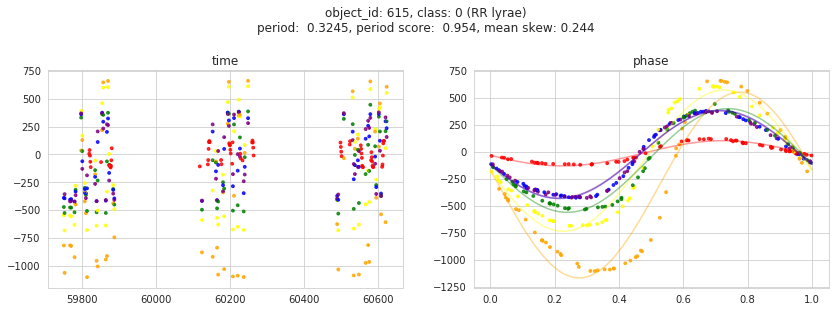

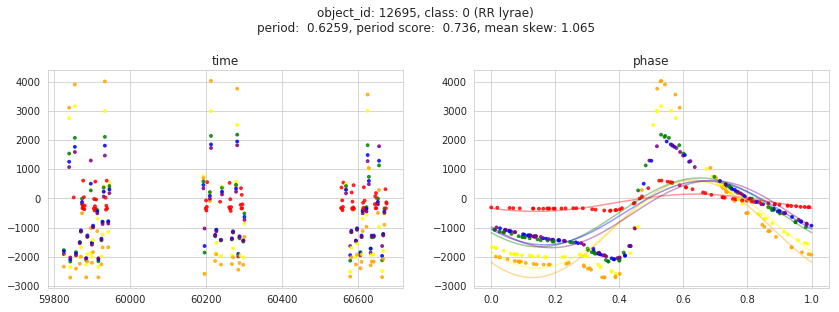

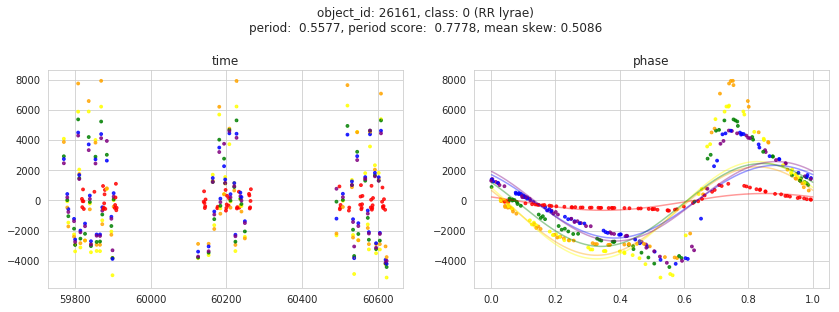

In [27]:
plot_phase_curves(feats_92, models_92)

### Eclipsing Binary stars: class 16

In [0]:
%%capture capt
feats_16, models_16 = get_class_feats(16)

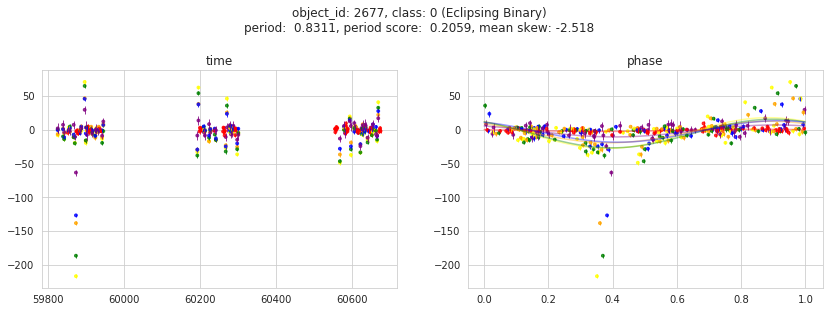

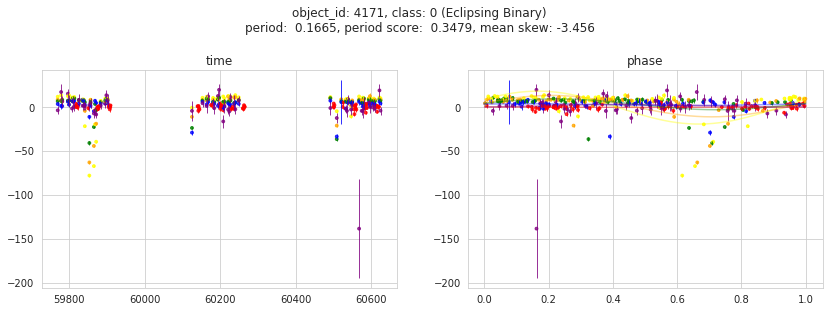

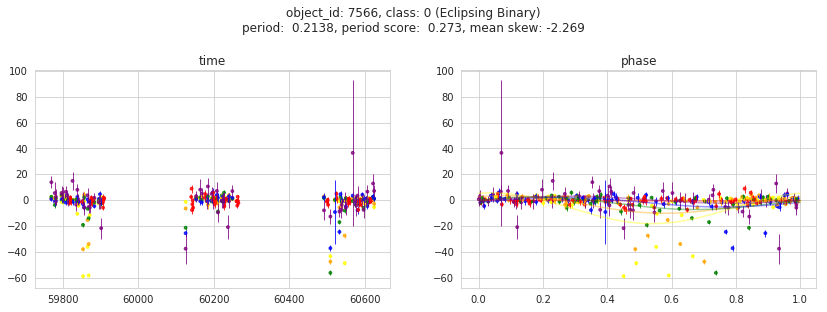

In [30]:
plot_phase_curves(feats_16, models_16)